# WK 8  Exploratory Data Analysis <hr style="border:2.5px solid" color="blue"></hr>

Name: **Patrick Rhy Andal** <br>
Course: **CPE2A**

In [794]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [795]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [796]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


In [797]:
display(df.describe())

,Process_Size,TDP,Die_Size,Transistors,Frequency
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057
std,44.956931,71.683029,116.523337,3736.859205,1066.701523
min,0.000000,1.000000,1.000000,8.000000,100.000000
25%,22.000000,35.000000,112.000000,180.000000,590.000000
50%,40.000000,67.000000,177.000000,950.000000,1073.500000
75%,90.000000,95.000000,221.000000,1929.922279,2400.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000


# General Overview of Data Distributions in Histogram

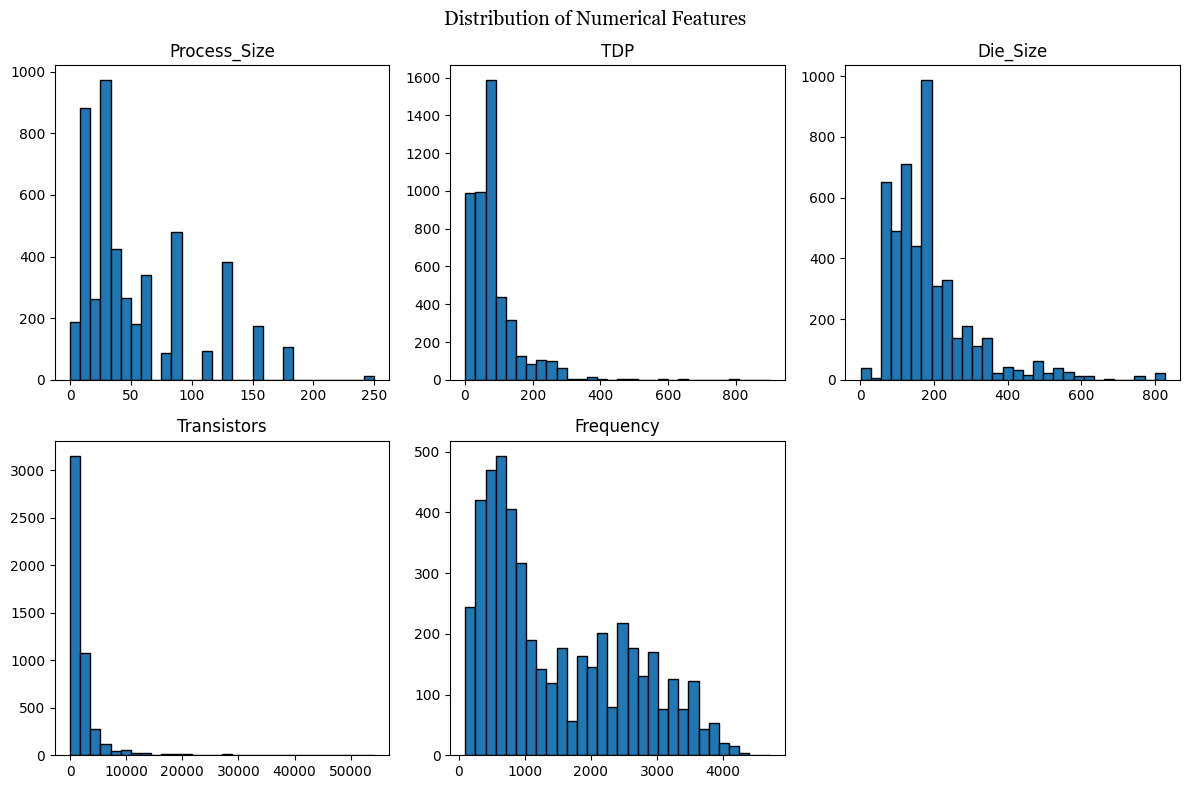

In [798]:
numerical_columns = ['Process_Size', 'TDP', 'Die_Size', 'Transistors', 'Frequency']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)
fig.delaxes(axes[-1])
fig.suptitle("Distribution of Numerical Features", fontfamily = 'Georgia' , fontsize=14)
plt.tight_layout()
plt.show()

# Number of Chips Manufactured

In [799]:
df_w = df.copy()

Text(0, 0.5, 'Number of Chips')

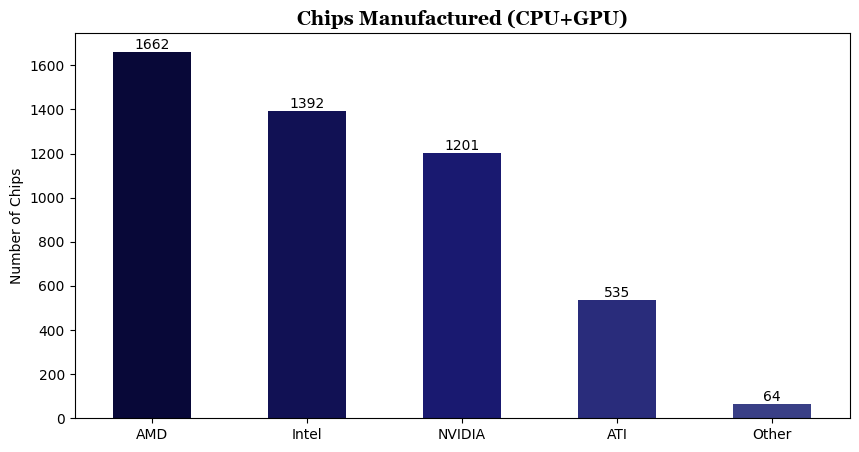

In [800]:
chip_count = df_w['Vendor'].value_counts()
chart = chip_count.plot(kind='bar',
                color = ['#080838','#111154','#191970','#292C7B','#393F86'],
                figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)', fontfamily = 'Georgia', fontsize = '14', fontweight = 'bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0) 
plt.ylabel('Number of Chips')

## Number of CPU Manufactured

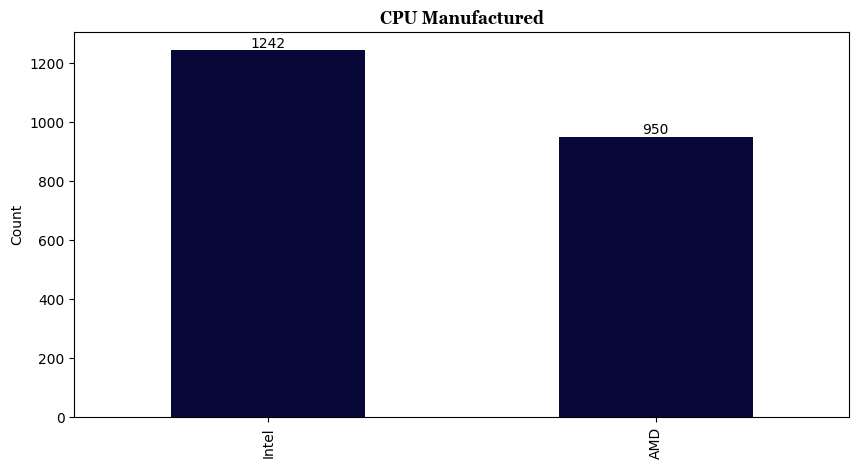

In [801]:
df_cpu = df_w[df_w['Type']=='CPU']
cpu_count = df_cpu['Vendor'].value_counts()
chart = cpu_count.plot(kind='bar',
                       color = ['#080838'],
                       figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Manufactured', fontfamily = 'Georgia', fontsize = '12', fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Number of GPU Manufactured

Text(0, 0.5, 'Number of Chips')

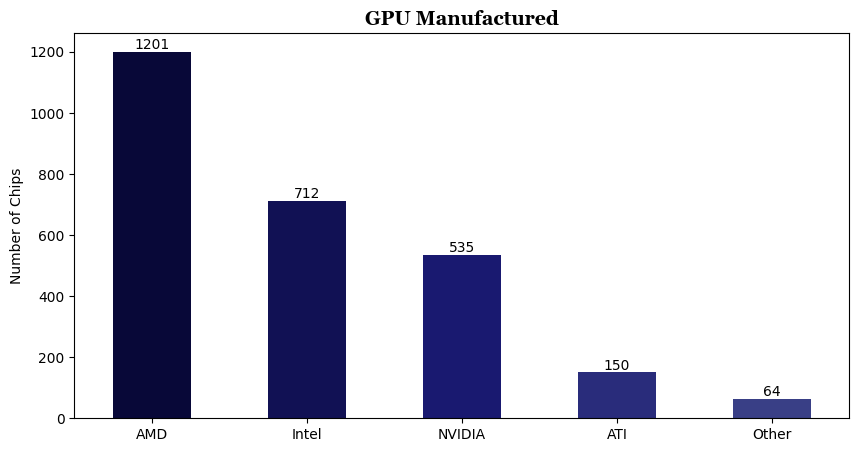

In [802]:
df_gpu = df_w[df_w['Type']=='GPU']
gpu_count = df_gpu['Vendor'].value_counts()
chart = gpu_count.plot(kind='bar',
                color = ['#080838','#111154','#191970','#292C7B','#393F86'],
                figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('GPU Manufactured', fontfamily = 'Georgia', fontsize = '14', fontweight = 'bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0) 
plt.ylabel('Number of Chips')

# CPU and GPU Process Size Trend

## CPU Process Size Trend

In [803]:
df_cpu_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cpu_ps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [804]:
df_cpu_ps['Date'] = pd.to_datetime(df_cpu_ps['Date'])
df_cpu_ps['Year'] = df_cpu_ps['Date'].dt.year
df_cpu_ps 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [805]:
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Text(0, 0.5, 'nm')

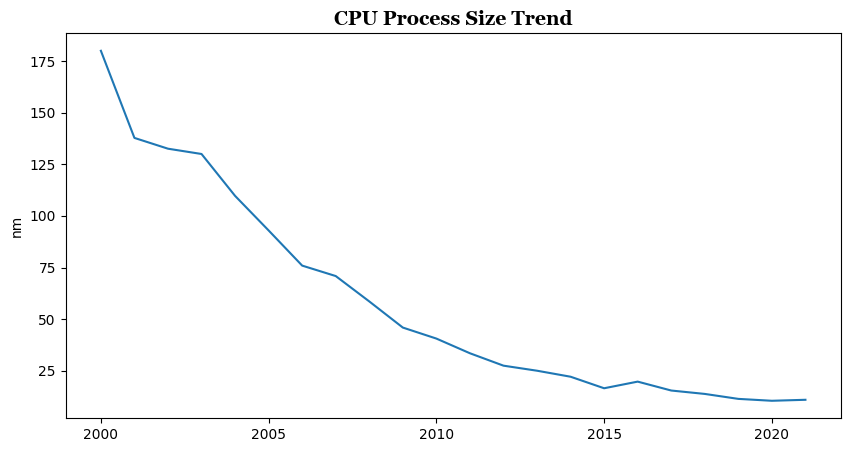

In [806]:
plt.figure(figsize=(10,5))
plt.plot(df_cpu_ps['Year'],df_cpu_ps['Process_Size'])
plt.title('CPU Process Size Trend', fontfamily = 'Georgia', fontsize = '14', fontweight = 'bold')
plt.ylabel('nm')

## GPU Process Size Trend

In [807]:
df_gpu_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_gpu_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [808]:
df_gpu_ps['Date'] = pd.to_datetime(df_gpu_ps['Date'])
df_gpu_ps['Year'] = df_gpu_ps['Date'].dt.year
df_gpu_ps

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [809]:
df_gpu_ps = df_gpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_gpu_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


Text(0, 0.5, 'nm')

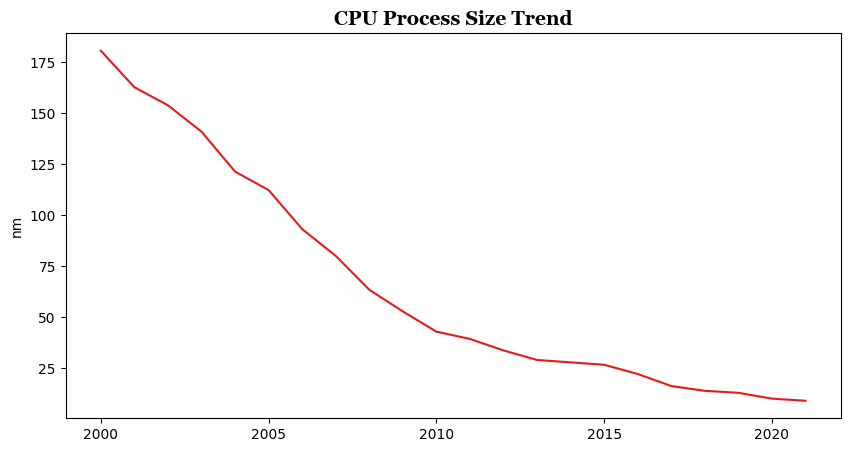

In [810]:
plt.figure(figsize=(10,5))
plt.plot(df_gpu_ps['Year'],df_gpu_ps['Process_Size'], color='#e41a1c')
plt.title('CPU Process Size Trend', fontfamily = 'Georgia', fontsize = '14', fontweight = 'bold')
plt.ylabel('nm')

## CPU and GPU Process Size Trend Comparison

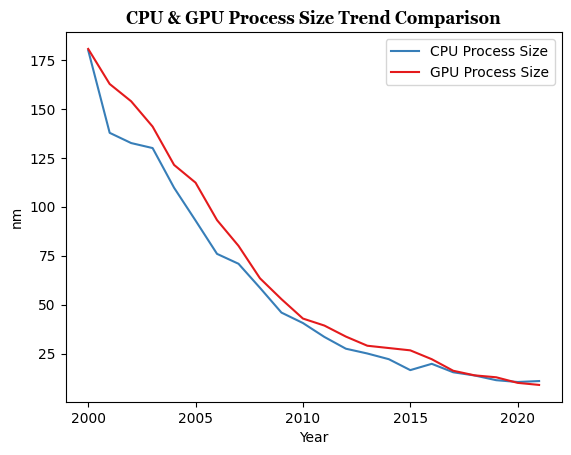

In [811]:
plt.plot(df_cpu_ps['Year'], df_cpu_ps['Process_Size'], color='#377eb8', label='CPU Process Size')
plt.plot(df_gpu_ps['Year'], df_gpu_ps['Process_Size'], color='#e41a1c', label='GPU Process Size')
plt.title('CPU & GPU Process Size Trend Comparison', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('nm')
plt.xlabel('Year')
plt.legend()
plt.show()

The comparison between CPU and GPU process size trends shows a consistent decline in both, indicating advancements in semiconductor manufacturing. While both follow a similar trajectory, GPUs tend to have slightly larger process sizes in earlier years but converge with CPUs over time. This trend reflects the industry's push for higher efficiency, performance, and transistor density in both processing units.

# CPU & GPU Lowest and Highest TDP (Thermal Design Power)

In [812]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [813]:
df_tdp_low = df_tdp.copy()
df_tdp_low = df_tdp_low.sort_values(by='TDP', ascending=True)
df_tdp_low

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [814]:
df_tdp_low = df_tdp_low.head(11)
df_tdp_low

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
1761,Intel Atom Z610,1.0
1424,Intel Atom Z510,2.0
512,Intel Atom Z510PT,2.0
1877,Intel Atom Z510P,2.0
135,Intel Atom Z605,2.0


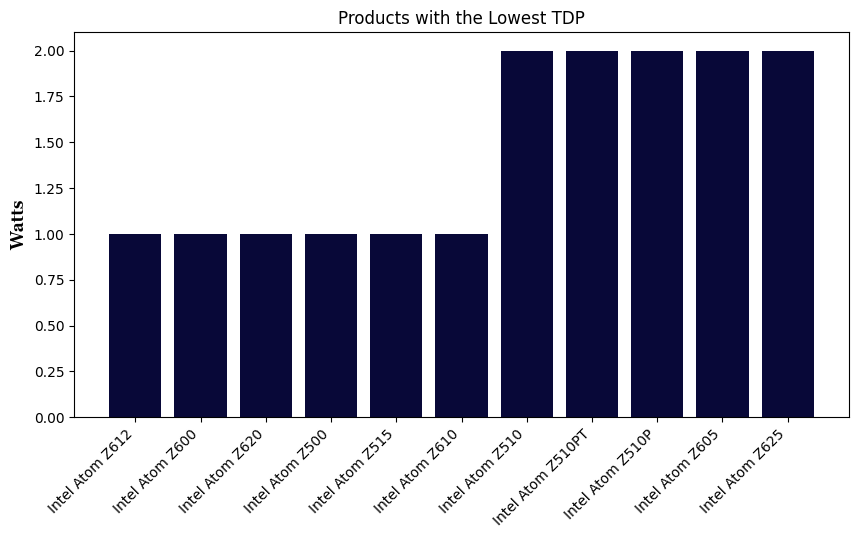

In [815]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp_low['Product'],df_tdp_low['TDP'],
        color = '#080838')
plt.title('Products with the Lowest TDP')
plt.ylabel('Watts', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [816]:
df_tdp_high = df_tdp.copy()
df_tdp_high = df_tdp_high.sort_values(by='TDP', ascending=False)
df_tdp_high

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
...,...,...
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0


In [817]:
df_tdp_high = df_tdp_high.head(11)
df_tdp_high

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
2522,NVIDIA Quadro Plex 2100 D4,640.0
4605,NVIDIA Quadro Plex 2100 S4,640.0
3788,NVIDIA Quadro Plex 7000,600.0
2790,NVIDIA Quadro Plex 2200 S4,600.0


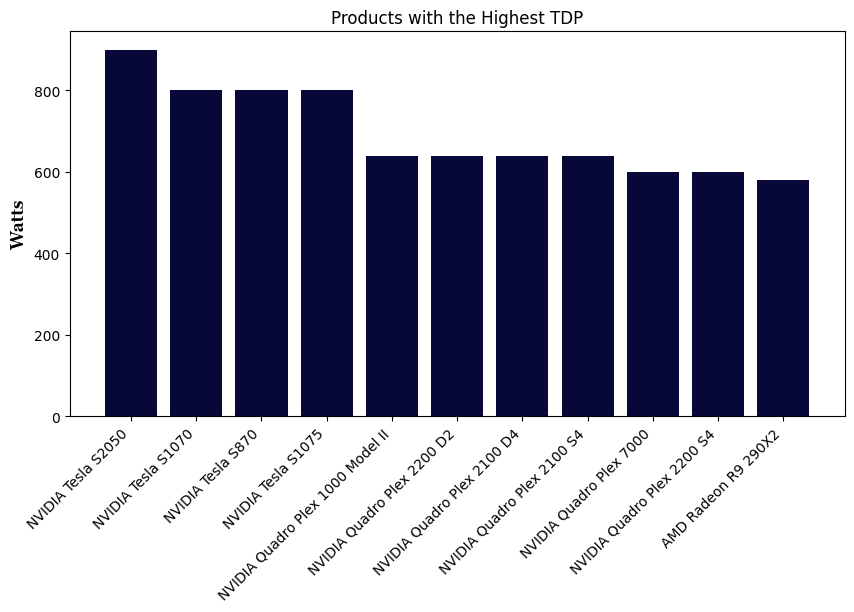

In [818]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp_high['Product'],df_tdp_high['TDP'],
        color = '#080838')
plt.title('Products with the Highest TDP')
plt.ylabel('Watts', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

## CPU Lowest TDP (Thermal Design Power)

In [819]:
df_cpu_tdp_low = df_w[['Type','Product','TDP']].where(df_w['Type']=='CPU').dropna()
df_cpu_tdp_low

,Type,Product,TDP
0,CPU,AMD Athlon 64 3500+,45.0
1,CPU,AMD Athlon 200GE,35.0
2,CPU,Intel Core i5-1145G7,28.0
3,CPU,Intel Xeon E5-2603 v2,80.0
4,CPU,AMD Phenom II X4 980 BE,125.0
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,185.0
2188,CPU,AMD Ryzen 9 4900H,54.0
2189,CPU,Intel Core 2 Duo E6550,65.0
2190,CPU,AMD Opteron 246,85.0


In [820]:
df_cpu_tdp_low = df_cpu_tdp_low.sort_values(by='TDP')
df_cpu_tdp_low

,Type,Product,TDP
60,CPU,Intel Atom Z515,1.0
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1761,CPU,Intel Atom Z610,1.0
1964,CPU,Intel Atom Z600,1.0
...,...,...,...
55,CPU,Intel Xeon Phi 7120X,300.0
535,CPU,Intel Xeon Phi 7295,320.0
1275,CPU,Intel Xeon Platinum 9242,350.0
2026,CPU,Intel Core i9-10990XE,380.0


In [821]:
df_cpu_tdp_low = df_cpu_tdp_low.head(11)
df_cpu_tdp_low

,Type,Product,TDP
60,CPU,Intel Atom Z515,1.0
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1761,CPU,Intel Atom Z610,1.0
1964,CPU,Intel Atom Z600,1.0
2175,CPU,Intel Atom Z612,1.0
858,CPU,Intel Atom Z540,2.0
1424,CPU,Intel Atom Z510,2.0
1802,CPU,Intel Atom Z615,2.0
135,CPU,Intel Atom Z605,2.0


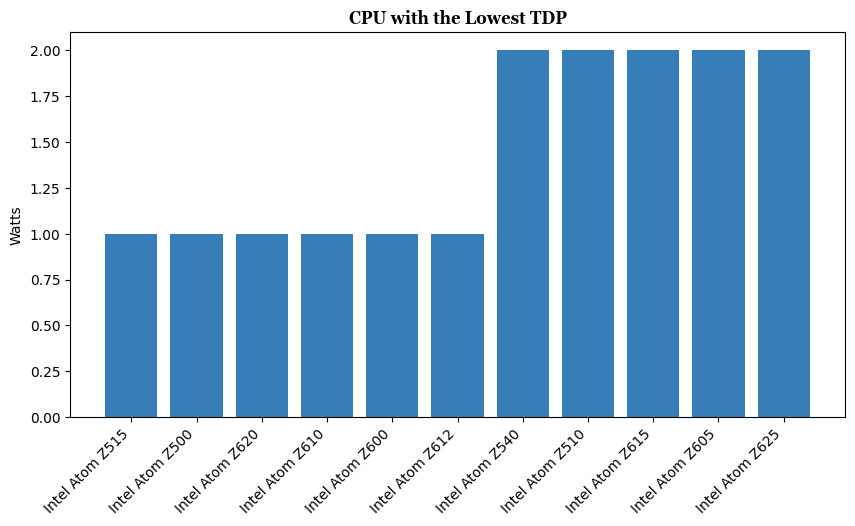

In [822]:
plt.figure(figsize=(10,5))
plt.bar(df_cpu_tdp_low['Product'],df_cpu_tdp_low['TDP'], color = '#377eb8')
plt.title('CPU with the Lowest TDP', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## GPU Lowest TDP (Thermal Design Power)

In [823]:
df_gpu_tdp_low = df_w[['Type','Product','TDP']].where(df_w['Type']=='GPU').dropna()
df_gpu_tdp_low

,Type,Product,TDP
2192,GPU,Intel Xeon E3-1275,95.000000
2193,GPU,Matrox Parhelia 128 MB,81.359981
2194,GPU,NVIDIA GeForce MX150 GP107,25.000000
2195,GPU,Intel GMA 500,81.359981
2196,GPU,ATI Radeon HD 4350 AGP,20.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,75.000000
4850,GPU,Intel GMA 950,7.000000
4851,GPU,NVIDIA GeForce GT 320M,23.000000
4852,GPU,NVIDIA GeForce FX 5200,81.359981


In [824]:
df_gpu_tdp_low = df_gpu_tdp_low.sort_values(by='TDP')
df_gpu_tdp_low

,Type,Product,TDP
3480,GPU,NVIDIA GeForce2 Go 100,2.0
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3101,GPU,NVIDIA GeForce2 Go,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0
2769,GPU,Intel HD Graphics 4200,4.0
...,...,...,...
4735,GPU,NVIDIA Quadro Plex 2200 D2,640.0
4064,GPU,NVIDIA Tesla S870,800.0
3603,GPU,NVIDIA Tesla S1070,800.0
2908,GPU,NVIDIA Tesla S1075,800.0


In [825]:
df_gpu_tdp_low = df_gpu_tdp_low.head(11)
df_gpu_tdp_low

,Type,Product,TDP
3480,GPU,NVIDIA GeForce2 Go 100,2.0
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3101,GPU,NVIDIA GeForce2 Go,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0
2769,GPU,Intel HD Graphics 4200,4.0
3184,GPU,Intel HD Graphics,4.0
3462,GPU,AMD Radeon HD 8180 IGP,4.0
2677,GPU,Sony Playstation Portable GPU 65nm,4.0
3188,GPU,Sony Playstation Vita GPU,4.0
2381,GPU,Sony Playstation Portable GPU 90nm,4.0


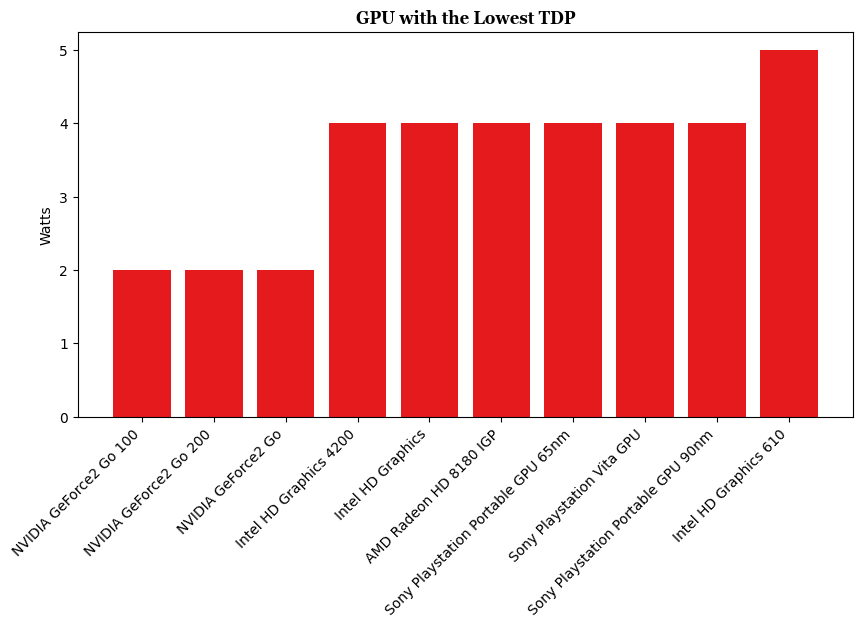

In [826]:
plt.figure(figsize=(10,5))
plt.bar(df_gpu_tdp_low['Product'],df_gpu_tdp_low['TDP'], color='#e41a1c')
plt.title('GPU with the Lowest TDP', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## CPU Highest TDP (Thermal Design Power)

In [827]:
df_cpu_tdp_high = df_w[['Type','Product','TDP']].where(df_w['Type']=='CPU').dropna()
df_cpu_tdp_high

,Type,Product,TDP
0,CPU,AMD Athlon 64 3500+,45.0
1,CPU,AMD Athlon 200GE,35.0
2,CPU,Intel Core i5-1145G7,28.0
3,CPU,Intel Xeon E5-2603 v2,80.0
4,CPU,AMD Phenom II X4 980 BE,125.0
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,185.0
2188,CPU,AMD Ryzen 9 4900H,54.0
2189,CPU,Intel Core 2 Duo E6550,65.0
2190,CPU,AMD Opteron 246,85.0


In [828]:
df_cpu_tdp_high = df_cpu_tdp_high.sort_values(by='TDP', ascending=False)
df_cpu_tdp_high

,Type,Product,TDP
1184,CPU,Intel Xeon Platinum 9282,400.0
2026,CPU,Intel Core i9-10990XE,380.0
1275,CPU,Intel Xeon Platinum 9242,350.0
535,CPU,Intel Xeon Phi 7295,320.0
1885,CPU,Intel Xeon Phi 3120P,300.0
...,...,...,...
60,CPU,Intel Atom Z515,1.0
1964,CPU,Intel Atom Z600,1.0
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0


In [829]:
df_cpu_tdp_high = df_cpu_tdp_high.head(11)
df_cpu_tdp_high

,Type,Product,TDP
1184,CPU,Intel Xeon Platinum 9282,400.0
2026,CPU,Intel Core i9-10990XE,380.0
1275,CPU,Intel Xeon Platinum 9242,350.0
535,CPU,Intel Xeon Phi 7295,320.0
1885,CPU,Intel Xeon Phi 3120P,300.0
1847,CPU,Intel Aubrey Isle,300.0
268,CPU,Intel Xeon Phi SE10P,300.0
1640,CPU,Intel Xeon Phi 3120A,300.0
150,CPU,Intel Xeon Phi 7110P,300.0
35,CPU,Intel Xeon Phi 7120A,300.0


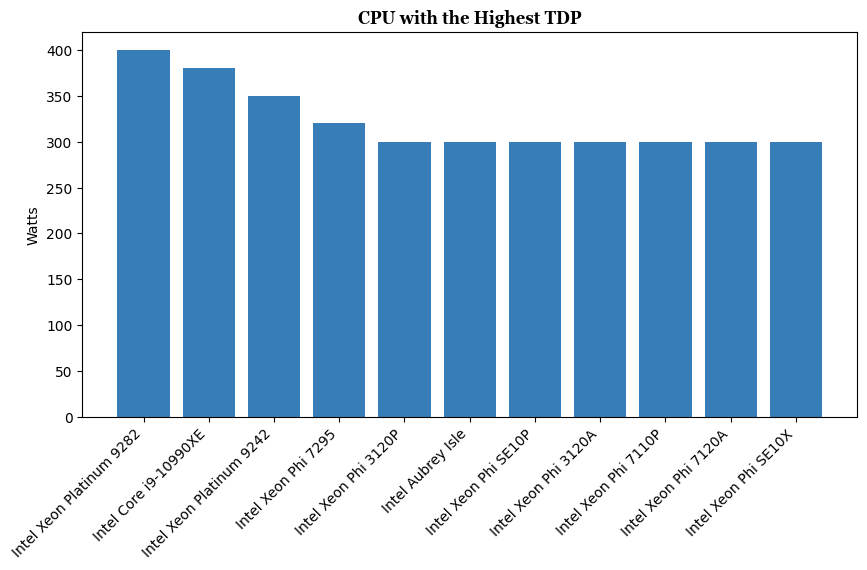

In [830]:
plt.figure(figsize=(10,5))
plt.bar(df_cpu_tdp_high['Product'],df_cpu_tdp_high['TDP'],
        color = '#377eb8')
plt.title('CPU with the Highest TDP', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## GPU Highest TDP (Thermal Design Power)

In [831]:
df_gpu_tdp_high = df_w[['Type','Product','TDP']].where(df_w['Type']=='GPU').dropna()
df_gpu_tdp_high

,Type,Product,TDP
2192,GPU,Intel Xeon E3-1275,95.000000
2193,GPU,Matrox Parhelia 128 MB,81.359981
2194,GPU,NVIDIA GeForce MX150 GP107,25.000000
2195,GPU,Intel GMA 500,81.359981
2196,GPU,ATI Radeon HD 4350 AGP,20.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,75.000000
4850,GPU,Intel GMA 950,7.000000
4851,GPU,NVIDIA GeForce GT 320M,23.000000
4852,GPU,NVIDIA GeForce FX 5200,81.359981


In [832]:
df_gpu_tdp_high = df_gpu_tdp_high.sort_values(by='TDP', ascending=False)
df_gpu_tdp_high

,Type,Product,TDP
4821,GPU,NVIDIA Tesla S2050,900.0
3603,GPU,NVIDIA Tesla S1070,800.0
4064,GPU,NVIDIA Tesla S870,800.0
2908,GPU,NVIDIA Tesla S1075,800.0
4420,GPU,NVIDIA Quadro Plex 1000 Model II,640.0
...,...,...,...
3184,GPU,Intel HD Graphics,4.0
3480,GPU,NVIDIA GeForce2 Go 100,2.0
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0


In [833]:
df_gpu_tdp_high = df_gpu_tdp_high.head(11)
df_gpu_tdp_high

,Type,Product,TDP
4821,GPU,NVIDIA Tesla S2050,900.0
3603,GPU,NVIDIA Tesla S1070,800.0
4064,GPU,NVIDIA Tesla S870,800.0
2908,GPU,NVIDIA Tesla S1075,800.0
4420,GPU,NVIDIA Quadro Plex 1000 Model II,640.0
4735,GPU,NVIDIA Quadro Plex 2200 D2,640.0
2522,GPU,NVIDIA Quadro Plex 2100 D4,640.0
4605,GPU,NVIDIA Quadro Plex 2100 S4,640.0
3788,GPU,NVIDIA Quadro Plex 7000,600.0
2790,GPU,NVIDIA Quadro Plex 2200 S4,600.0


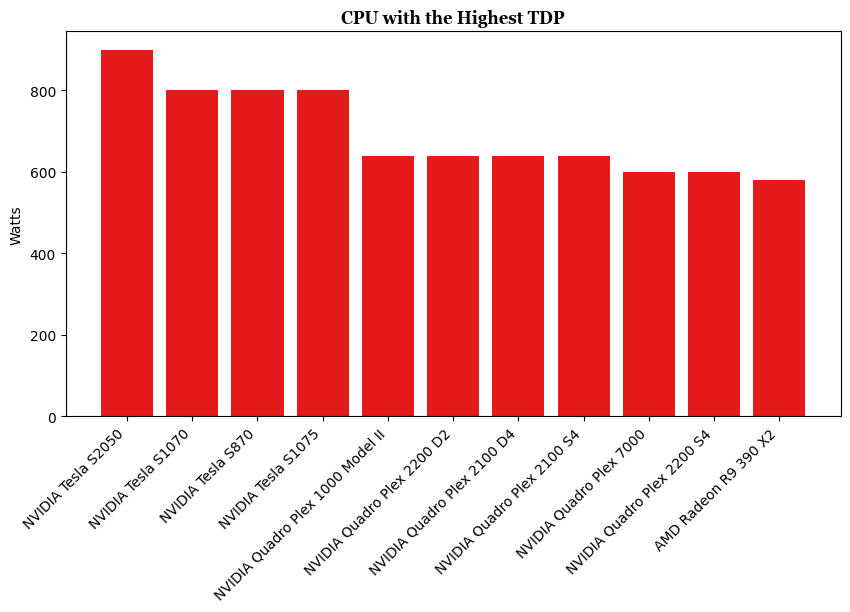

In [834]:
plt.figure(figsize=(10,5))
plt.bar(df_gpu_tdp_high['Product'],df_gpu_tdp_high['TDP'],
        color = '#e41a1c')
plt.title('CPU with the Highest TDP', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# CPU & GPU TDP (Thermal Design Power) Trend

## CPU TDP Trend

In [835]:
df_cpu_tdp = df_w[['Type','Date','TDP']].where(df_w['Type']=='CPU').dropna()
df_cpu_tdp

,Type,Date,TDP
0,CPU,2/20/2007,45.0
1,CPU,9/6/2018,35.0
2,CPU,9/2/2020,28.0
3,CPU,9/1/2013,80.0
4,CPU,5/3/2011,125.0
...,...,...,...
2187,CPU,4/6/2021,185.0
2188,CPU,3/16/2020,54.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,85.0


In [836]:
df_cpu_tdp['Date'] = pd.to_datetime(df_cpu_tdp['Date'])
df_cpu_tdp['Year'] = df_cpu_tdp['Date'].dt.year
df_cpu_tdp 

,Type,Date,TDP,Year
0,CPU,2007-02-20,45.0,2007.0
1,CPU,2018-09-06,35.0,2018.0
2,CPU,2020-09-02,28.0,2020.0
3,CPU,2013-09-01,80.0,2013.0
4,CPU,2011-05-03,125.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,185.0,2021.0
2188,CPU,2020-03-16,54.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,85.0,2004.0


In [837]:
df_cpu_tdp = df_cpu_tdp.groupby('Year')['TDP'].mean().reset_index()
df_cpu_tdp

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


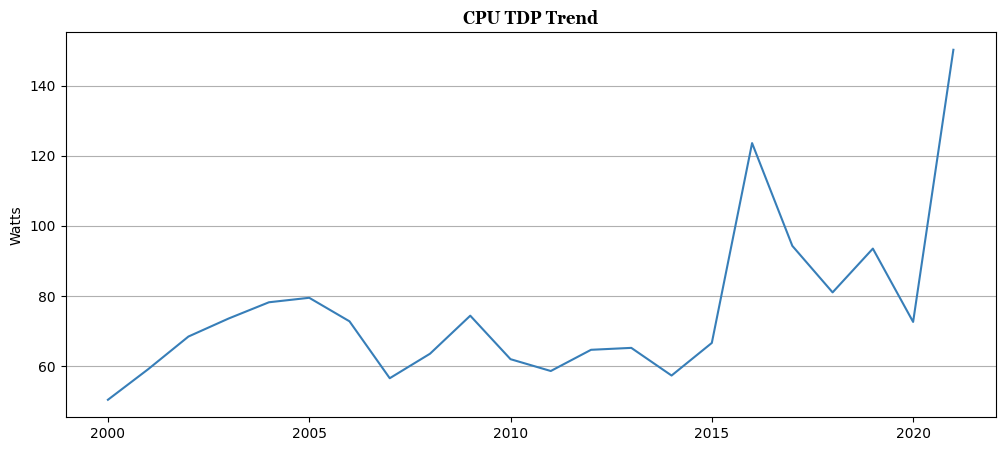

In [838]:
plt.figure(figsize=(12,5))
plt.plot(df_cpu_tdp['Year'],df_cpu_tdp['TDP'], color='#377eb8')
plt.title('CPU TDP Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Watts')
plt.grid(axis='y', linestyle='-', alpha=1)

## GPU TDP Trend

In [839]:
df_gpu_tdp = df_w[['Type','Date','TDP']].where(df_w['Type']=='GPU').dropna()
df_gpu_tdp

,Type,Date,TDP
2192,GPU,4/3/2011,95.000000
2193,GPU,6/25/2002,81.359981
2194,GPU,2/23/2019,25.000000
2195,GPU,3/2/2008,81.359981
2196,GPU,9/30/2008,20.000000
...,...,...,...
4849,GPU,2/22/2011,75.000000
4850,GPU,6/1/2005,7.000000
4851,GPU,3/3/2010,23.000000
4852,GPU,3/6/2003,81.359981


In [840]:
df_gpu_tdp['Date'] = pd.to_datetime(df_gpu_tdp['Date'])
df_gpu_tdp['Year'] = df_gpu_tdp['Date'].dt.year
df_gpu_tdp

,Type,Date,TDP,Year
2192,GPU,2011-04-03,95.000000,2011.0
2193,GPU,2002-06-25,81.359981,2002.0
2194,GPU,2019-02-23,25.000000,2019.0
2195,GPU,2008-03-02,81.359981,2008.0
2196,GPU,2008-09-30,20.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,75.000000,2011.0
4850,GPU,2005-06-01,7.000000,2005.0
4851,GPU,2010-03-03,23.000000,2010.0
4852,GPU,2003-03-06,81.359981,2003.0


In [841]:
df_gpu_tdp = df_gpu_tdp.groupby('Year')['TDP'].mean().reset_index()
df_gpu_tdp

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


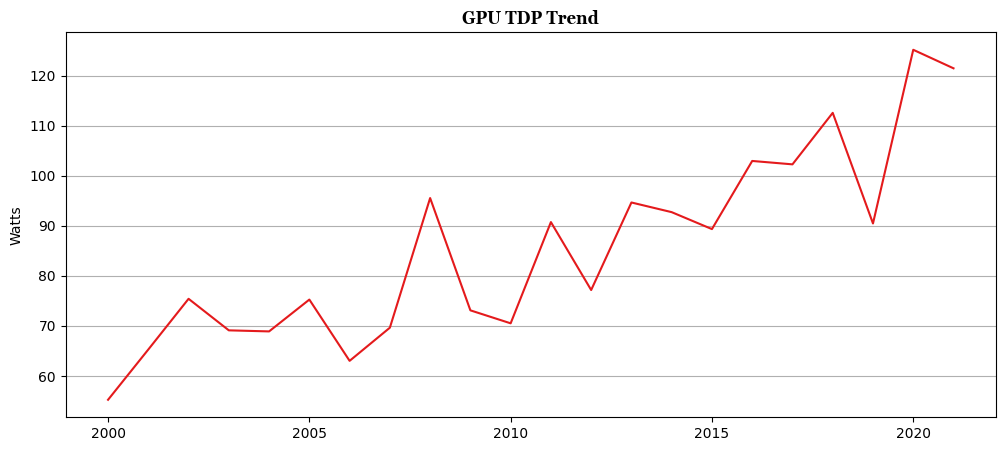

In [842]:
plt.figure(figsize=(12,5))
plt.plot(df_gpu_tdp['Year'],df_gpu_tdp['TDP'], color='#e41a1c')
plt.title('GPU TDP Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Watts')
plt.grid(axis='y', linestyle='-', alpha=1)

## CPU and GPU TDP Trend Comparison

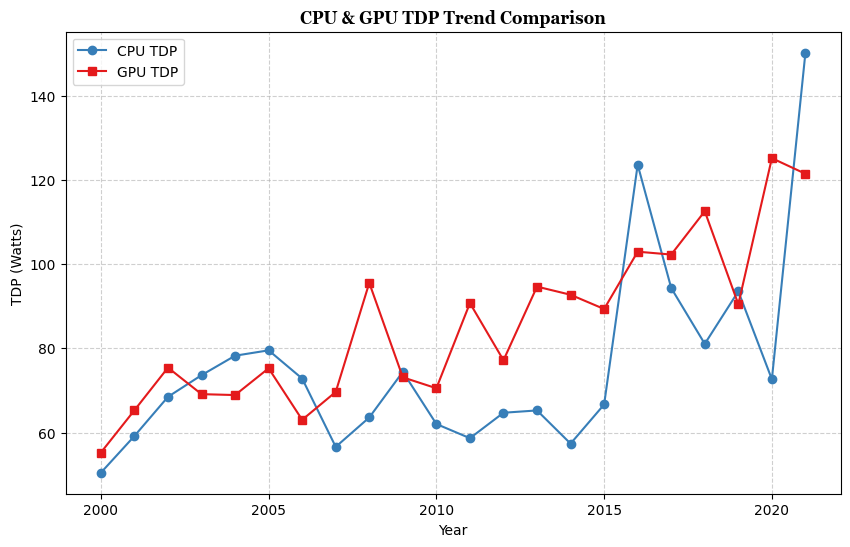

In [843]:
plt.figure(figsize=(10, 6))
plt.plot(df_cpu_tdp['Year'], df_cpu_tdp['TDP'], color='#377eb8', marker='o', label='CPU TDP')
plt.plot(df_gpu_tdp['Year'], df_gpu_tdp['TDP'], color='#e41a1c', marker='s', label='GPU TDP')
plt.title('CPU & GPU TDP Trend Comparison', fontfamily='Georgia' ,fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('TDP (Watts)', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The comparison of CPU and GPU TDP trends from 2000 to 2020 indicates that, while both have seen an overall increase in power consumption, GPU TDPs have shown a more significant and consistent rise, especially after 2015. This suggests that GPUs have become more power-intensive compared to CPUs, reflecting their increasing computational demands and performance capabilities. Consequently, designing efficient cooling systems and power supplies for modern GPUs has become increasingly important.

# CPU & GPU Die Size Trend

## CPU Die Size Trend

In [844]:
df_cpu_ds = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_cpu_ds

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [845]:
df_cpu_ds['Date'] = pd.to_datetime(df_cpu_ds['Date'])
df_cpu_ds['Year'] = df_cpu_ds['Date'].dt.year
df_cpu_ds

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [846]:
df_cpu_ds = df_cpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_cpu_ds

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


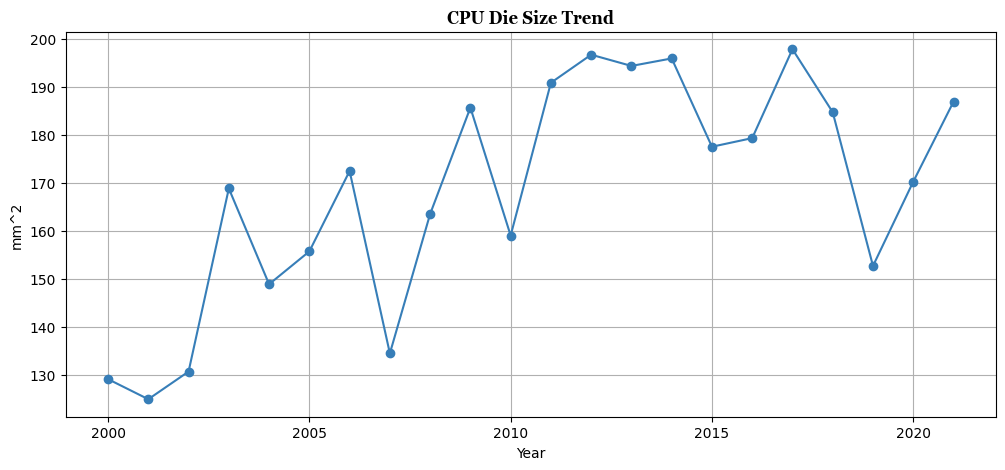

In [847]:
plt.figure(figsize=(12,5))
plt.plot(df_cpu_ds['Year'],df_cpu_ds['Die_Size'], color='#377eb8', marker = "o", linestyle = "-")
plt.xlabel('Year')
plt.ylabel('mm^2')
plt.title('CPU Die Size Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.grid(True)

## GPU Die Size Trend

In [848]:
df_gpu_ds = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_gpu_ds

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [849]:
df_gpu_ds['Date'] = pd.to_datetime(df_gpu_ds['Date'])
df_gpu_ds['Year'] = df_gpu_ds['Date'].dt.year
df_gpu_ds

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [850]:
df_gpu_ds = df_gpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_gpu_ds

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


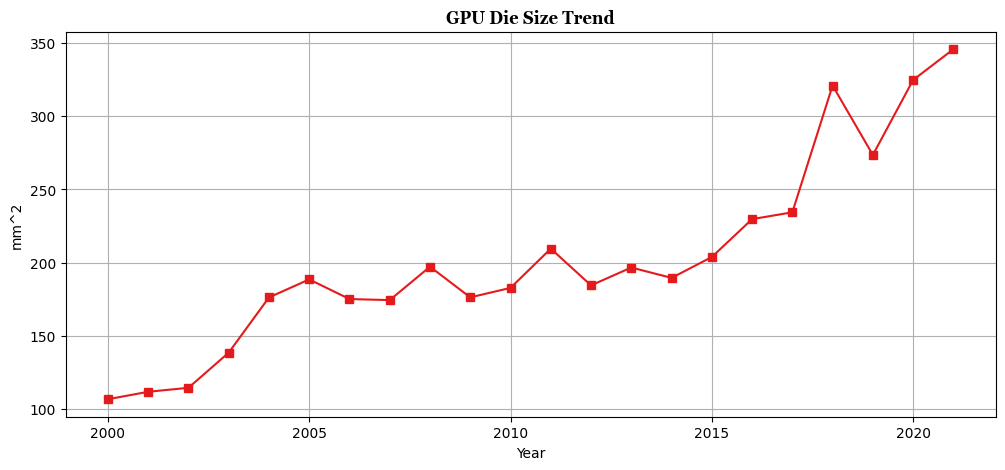

In [872]:
plt.figure(figsize=(12,5))
plt.plot(df_gpu_ds['Year'],df_gpu_ds['Die_Size'], color='#e41a1c', marker = "s", linestyle = "-")
plt.xlabel('Year')
plt.ylabel('mm^2')
plt.title('GPU Die Size Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.grid(True)

## CPU & GPU Die Size Trend Comparison

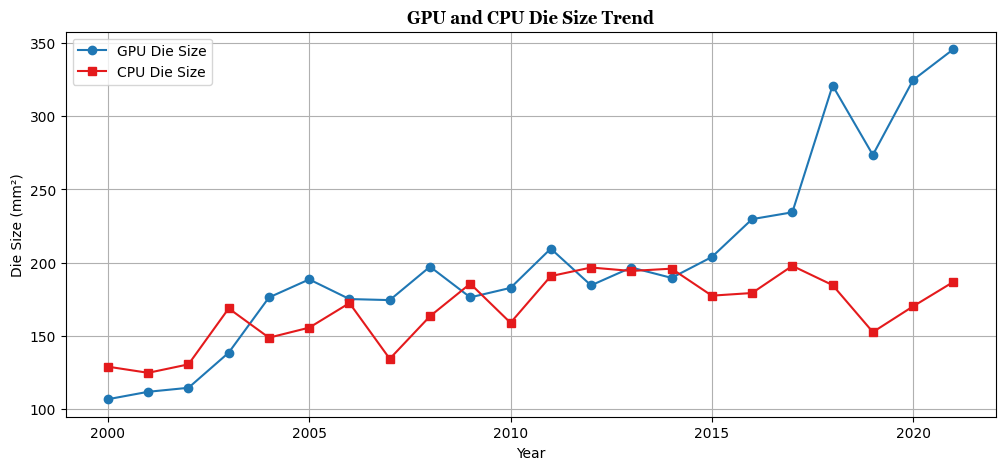

In [880]:
plt.figure(figsize=(12, 5))
plt.plot(df_gpu_ds['Year'], df_gpu_ds['Die_Size'], color='#1F77B4', marker='o', label='GPU Die Size')
plt.plot(df_cpu_ds['Year'], df_cpu_ds['Die_Size'], color='#e41a1c', marker='s', label='CPU Die Size')

plt.title('GPU and CPU Die Size Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()
plt.grid(True)
plt.show()

The comparison of GPU and CPU die size trends over the years shows that GPU die sizes have increased significantly, surpassing 300 mm² by 2022, whereas CPU die sizes have remained relatively stable around 150 mm². This indicates that GPUs have become increasingly complex and powerful, requiring larger die sizes to accommodate their enhanced capabilities. In contrast, CPUs have maintained more consistent die sizes, reflecting a different trajectory in their performance and development.

# CPU & GPU Transistor Count Trend

## CPU Transistor Count Trend

In [855]:
df_cpu_tran= df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_cpu_tran

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [857]:
df_cpu_tran['Date'] = pd.to_datetime(df_cpu_tran['Date'])
df_cpu_tran['Year'] = df_cpu_tran['Date'].dt.year
df_cpu_tran

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [858]:
df_cpu_tran = df_cpu_tran.groupby('Year')['Transistors'].mean().reset_index()
df_cpu_tran

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


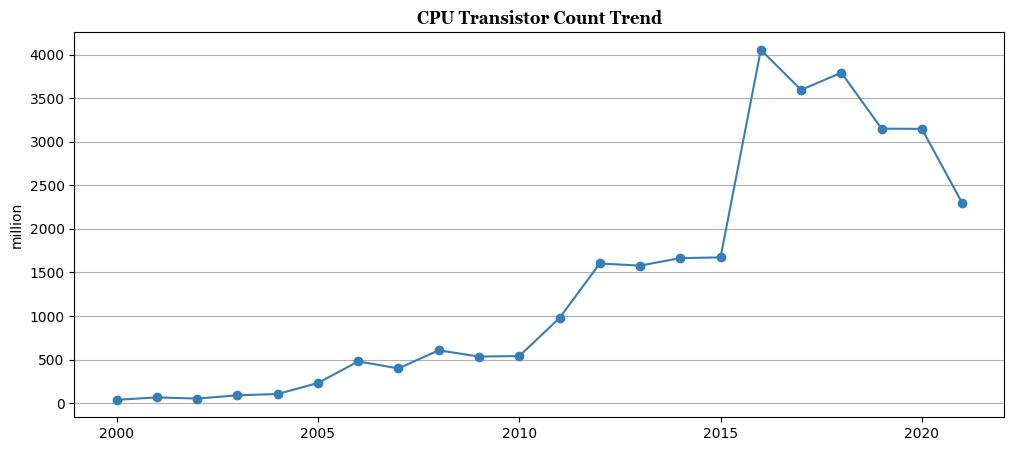

In [865]:
plt.figure(figsize=(12,5))
plt.plot(df_cpu_tran['Year'],df_cpu_tran['Transistors'], color='#377eb8', marker = "o")
plt.title('CPU Transistor Count Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('million')
plt.grid(axis='y', linestyle='-', alpha=1)

## GPU Transistor Count Trend

In [867]:
df_gpu_tran = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_gpu_tran

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [869]:
df_gpu_tran['Date'] = pd.to_datetime(df_gpu_tran['Date'])
df_gpu_tran['Year'] = df_gpu_tran['Date'].dt.year
df_gpu_tran

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [871]:
df_gpu_tran = df_gpu_tran.groupby('Year')['Transistors'].mean().reset_index()
df_gpu_tran

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


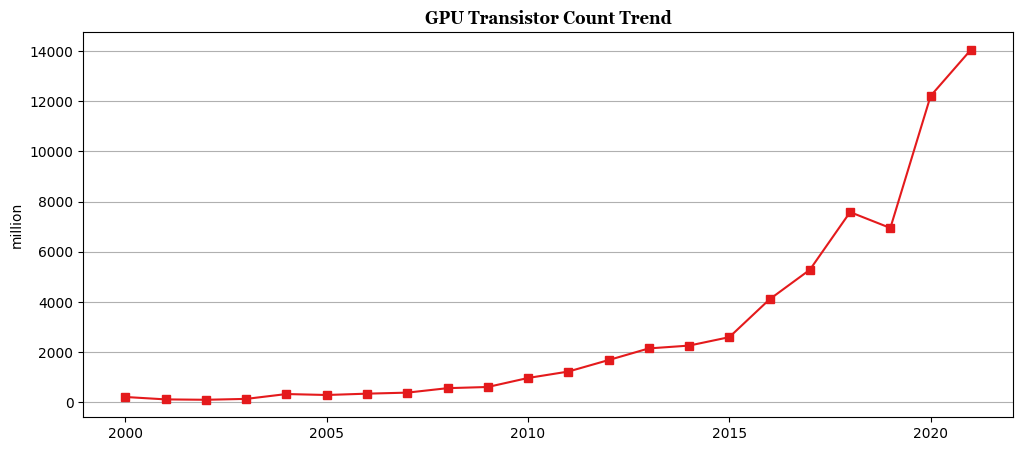

In [874]:
plt.figure(figsize=(12,5))
plt.plot(df_gpu_tran['Year'],df_gpu_tran['Transistors'], color='#e41a1c', marker = "s")
plt.title('GPU Transistor Count Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('million')
plt.grid(axis='y', linestyle='-', alpha=1)

## CPU & GPU Transistor Count Trend Comparison

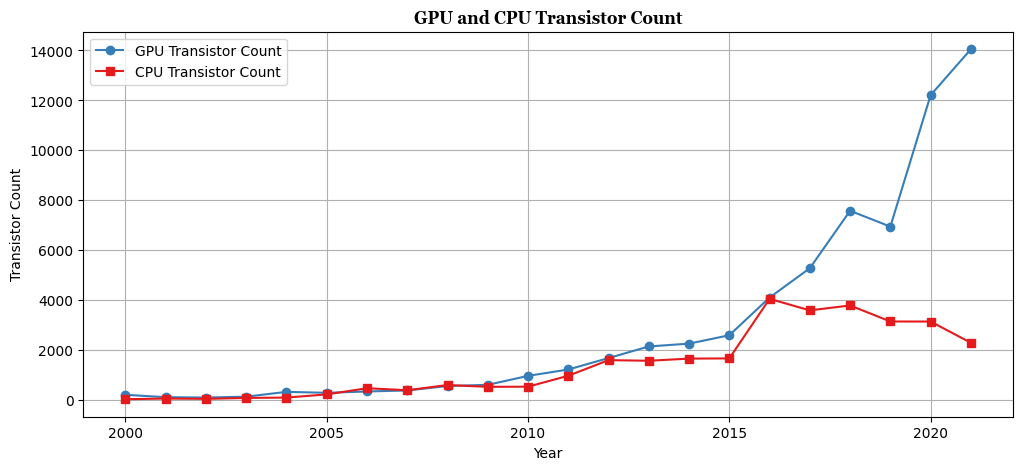

In [881]:
plt.figure(figsize=(12, 5))
plt.plot(df_gpu_tran['Year'], df_gpu_tran['Transistors'], color='#377eb8', marker = "o", label='GPU Transistor Count')
plt.plot(df_cpu_tran['Year'], df_cpu_tran['Transistors'], color='#e41a1c', marker = "s", label='CPU Transistor Count')
plt.title('GPU and CPU Transistor Count', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Transistor Count')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

The line graph demonstrates a comparison between CPU and GPU die size trends, revealing that GPU die sizes have increased significantly over time, reaching over 800 mm² in 2022, while CPU die sizes have remained relatively stable around 300 mm². This trend indicates that GPUs have become more complex and capable, requiring larger die sizes to support their enhanced performance and computational demands. In contrast, CPUs have maintained consistent die sizes, reflecting a different developmental trajectory and a more gradual evolution in their performance capabilities.

# CPU & GPU Frquency Trend

## CPU Frequency Trend

In [884]:
df_cpu_freq = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_cpu_freq

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [885]:
df_cpu_freq['Date'] = pd.to_datetime(df_cpu_freq['Date'])
df_cpu_freq['Year'] = df_cpu_freq['Date'].dt.year
df_cpu_freq

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [888]:
df_cpu_freq = df_cpu_freq.groupby('Year')['Frequency'].mean().reset_index()
df_cpu_freq

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


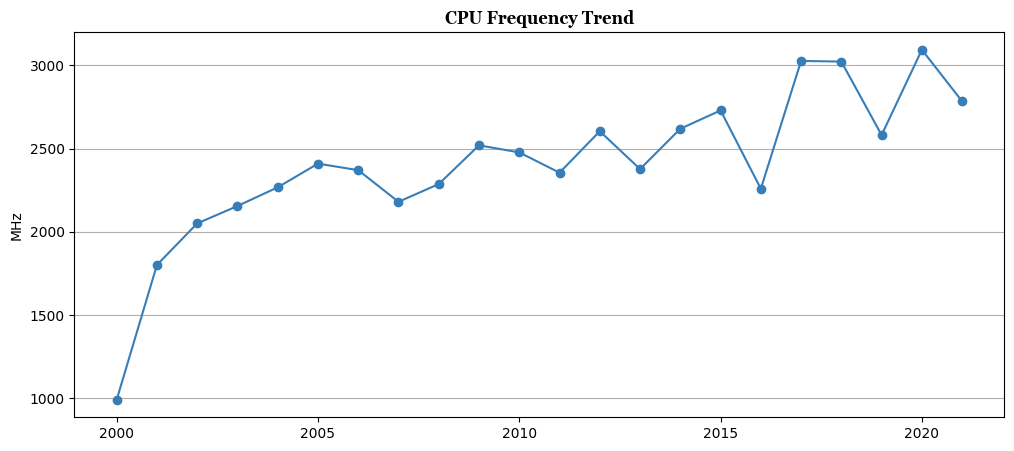

In [889]:
plt.figure(figsize=(12,5))
plt.plot(df_cpu_freq['Year'],df_cpu_freq['Frequency'], color='#377eb8', marker = "o")
plt.title('CPU Frequency Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('MHz')
plt.grid(axis='y', linestyle='-', alpha=1)

## GPU Frequency Trend

In [891]:
df_gpu_freq = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_gpu_freq

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [892]:
df_gpu_freq['Date'] = pd.to_datetime(df_gpu_freq['Date'])
df_gpu_freq['Year'] = df_gpu_freq['Date'].dt.year
df_gpu_freq


,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [893]:
df_gpu_freq = df_gpu_freq.groupby('Year')['Frequency'].mean().reset_index()
df_gpu_freq

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


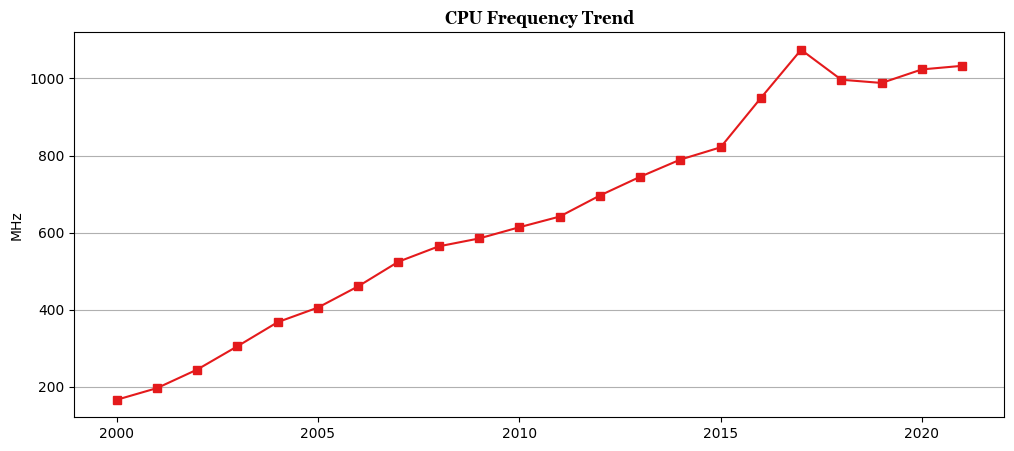

In [894]:
plt.figure(figsize=(12,5))
plt.plot(df_gpu_freq['Year'],df_gpu_freq['Frequency'], color='#377eb8', marker = "o")
plt.title('CPU Frequency Trend', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('MHz')
plt.grid(axis='y', linestyle='-', alpha=1)

## CPU & GPU Frequency Trend Comparison

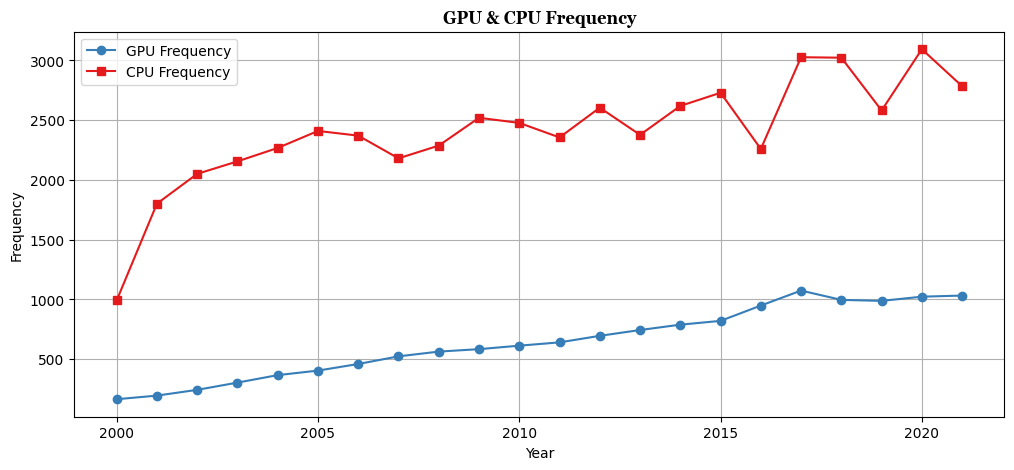

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_gpu_freq['Year'], df_gpu_freq['Frequency'], color='#377eb8', marker = "o", label='GPU Frequency')
plt.plot(df_cpu_freq['Year'], df_cpu_freq['Frequency'], color='#e41a1c', marker = "s", label='CPU Frequency')
plt.title('GPU & CPU Frequency', fontfamily = 'Georgia', fontsize=12, fontweight='bold')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

The line graph illustrates a comparison of CPU and GPU frequency trends from 2000 to 2020. CPU frequencies experienced a rapid increase until around 2005, after which they remained relatively stable. In contrast, GPU frequencies exhibited a steady and continuous increase, though at a slower rate than CPU frequencies, highlighting different development trajectories for CPUs and GPUs over the two decades.

# Average Frequency per Brand (Vendor)

Text(0.5, 1.0, 'Average Frequency per Brand')

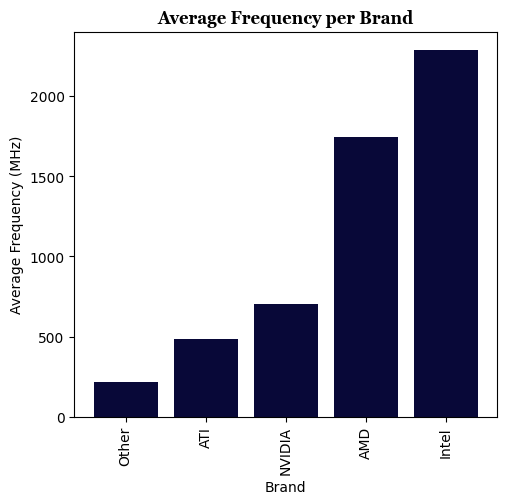

In [904]:
df.rename(columns={"Vendor": "Brand"}, inplace=True)
avg_freq_per_brand = df.groupby("Brand")["Frequency"].mean().sort_values()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(avg_freq_per_brand.index, avg_freq_per_brand.values, color='#080838')
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Frequency (MHz)")
plt.title("Average Frequency per Brand", fontfamily = 'Georgia', fontsize=12, fontweight='bold')


The average frequency per brand varies significantly, with some brands consistently producing higher-frequency chips than others. This suggests that certain manufacturers focus on optimizing clock speeds, potentially for performance-driven applications. Brands with lower average frequencies may prioritize power efficiency, thermal management, or other design factors over raw speed.

# Scatter Plot of Transistor Count vs. Frequency

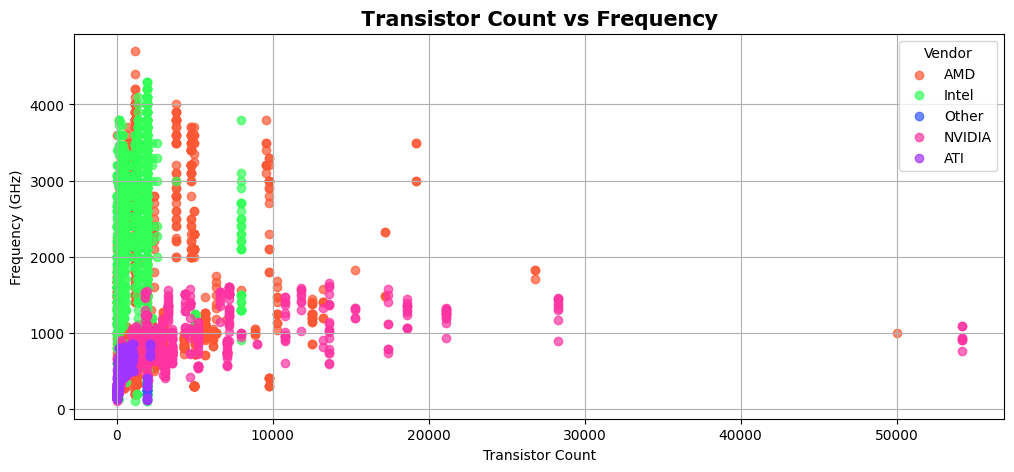

In [910]:
plt.figure(figsize=(12,5))
vendors = df['Brand'].unique()
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#A133FF", "#33FFF0", "#FFD433", "#FF8333", "#6A33FF", "#33FFB5"]

for i, vendor in enumerate(vendors):
    subset = df[df['Brand'] == vendor]
    plt.scatter(subset['Transistors'], subset['Frequency'], label=vendor, color=colors[i % len(colors)], alpha=0.7)

plt.title("Transistor Count vs Frequency",
          fontfamily='Verdana', 
          fontsize=15, 
          fontweight='bold')
plt.xlabel("Transistor Count")
plt.ylabel("Frequency (GHz)")
plt.grid(axis='both', linestyle='-', alpha=1)
plt.legend(title="Vendor", bbox_to_anchor=(1,1))
plt.show()

The scatter plot reveals a diverse relationship between transistor count and frequency, indicating that higher transistor counts do not always correlate with higher frequencies. Some chips with a high transistor count maintain moderate frequencies, likely due to architectural constraints or power efficiency considerations. This suggests that while frequency is important, other factors such as process node, power consumption, and design optimization play critical roles in chip performance.